In [12]:
# # Variable Description
# •	Item_ID: Unique product ID
# •	Item_Weight: Weight of the product
# •	Item_Sugar_Content: Sugar content of the product
# •	Item_Visibility: The percentage of total display area of all products in Chief Babatunji’s supermarket allocated to the particular product
# •	Item_Type: The category to which the product belongs
# •	Item_Price: Retail price of the product
# •	Store_ID: Unique store ID
# •	Store_Start_Year: The year in which store was opened
# •	Store_Size: The size of the store in terms of total ground area covered
# •	Store_Location_Type: The type of city in which the store is located
# •	Store_Type: Description of the store based on category of items sold
# •	Item_Store_ID: Unique identifier of each product type per supermarket.
# •	Item_Store_Returns: Profit returns on the product in the particular store. This is the outcome variable to be predicted.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Babatunde Store.xls')

In [4]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [6]:
# filling empty values
df['Store_Size'] = df['Store_Size'].fillna(df['Store_Size'].mode()[0])

In [7]:
df['Item_Weight'] = df['Item_Weight'].fillna(round(df['Item_Weight'].mean(),3))

In [8]:
df.to_csv('Babatunde Score.csv')

C:\Users\Melie\AppData\Local\Temp\ipykernel_11220\2178203693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df,x=df['Item_Weight'])


<AxesSubplot:ylabel='Density'>

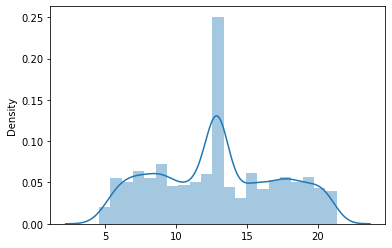

In [9]:
sns.distplot(a=df,x=df['Item_Weight'])

In [10]:
df['Item_Weight'].value_counts()

12.909    802
12.150     57
17.600     51
10.500     47
15.100     44
         ... 
6.280       1
6.235       1
7.070       1
6.760       1
8.485       1
Name: Item_Weight, Length: 400, dtype: int64

In [11]:
round(df['Item_Weight'].mean(),3)

12.909

In [13]:
df['Item_Weight'].value_counts()

12.909    802
12.150     57
17.600     51
10.500     47
15.100     44
         ... 
6.280       1
6.235       1
7.070       1
6.760       1
8.485       1
Name: Item_Weight, Length: 400, dtype: int64

In [14]:
df['Store_Size'].value_counts()

Medium    3032
Small     1364
High       594
Name: Store_Size, dtype: int64

In [15]:
df['Store_ID'].nunique()

10

In [16]:
df['Store_Location_Type'].unique()

array(['Cluster 3', 'Cluster 2', 'Cluster 1'], dtype=object)

In [17]:
df['Store_ID'].value_counts()

BABATUNJI049    620
BABATUNJI013    594
BABATUNJI017    583
BABATUNJI035    515
BABATUNJI046    509
BABATUNJI018    500
BABATUNJI045    483
BABATUNJI027    462
BABATUNJI010    384
BABATUNJI019    340
Name: Store_ID, dtype: int64

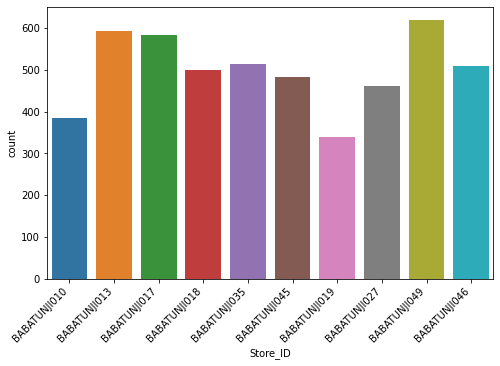

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Store_ID',data =df)
plt.xticks(rotation = 45,ha='right')
plt.show()

From the graph above ,I can deduce that  "BABTUNJIO49"  was the store with the Highest number of products sold.

In [19]:
# Performing a groupby to get infotmation about individual Stores
Stores = df.groupby('Store_ID')

In [20]:
Stores.sum()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
Store_ID,,,,,
BABATUNJI010,4945.965,39.398329,104234.38,769920,240638.60
BABATUNJI013,7609.240,34.949318,151975.79,1184436,2407829.22
BABATUNJI017,7535.455,35.107191,259352.45,1174162,4370201.60
BABATUNJI018,6494.185,30.564383,192849.77,1008000,2770310.84
BABATUNJI019,4389.060,37.774849,149500.22,677280,357844.32
BABATUNJI027,5963.958,27.267124,219606.99,920304,5803269.64
BABATUNJI035,6729.230,31.194159,237277.16,1035665,4058828.52
BABATUNJI045,6129.155,29.444659,226543.31,970347,3567311.83
BABATUNJI046,6597.860,30.213267,181327.58,1020036,2945704.10


In [21]:
Stores['Item_Store_Returns'].sum()

Store_ID
BABATUNJI010     240638.60
BABATUNJI013    2407829.22
BABATUNJI017    4370201.60
BABATUNJI018    2770310.84
BABATUNJI019     357844.32
BABATUNJI027    5803269.64
BABATUNJI035    4058828.52
BABATUNJI045    3567311.83
BABATUNJI046    2945704.10
BABATUNJI049    3934626.95
Name: Item_Store_Returns, dtype: float64

In [22]:
print(Stores.sum().idxmax()['Item_Store_Returns'])

BABATUNJI027


After The groupby, it is deduced that "BABATUNJI027" was the store with the highest returns( Profit )

In [23]:
stores = ['BABATUNJI010', 'BABATUNJI013', 'BABATUNJI017', 'BABATUNJI018','BABATUNJI035', 'BABATUNJI045', 'BABATUNJI019', 'BABATUNJI027','BABATUNJI049', 'BABATUNJI046']

In [24]:
(Stores.sum().max()['Item_Store_Returns']/df['Item_Store_Returns'].sum()) * 100

19.05424831022034

In [25]:
(df['Store_ID'].value_counts()['BABATUNJI027']/df.shape[0]) * 100

9.258517034068136

In [26]:
for x in stores:
    percent = (Stores['Item_Store_Returns'].sum()[x]/df['Item_Store_Returns'].sum()) * 100
    print(f'{x} = {percent.round(2)}%')

BABATUNJI010 = 0.79%
BABATUNJI013 = 7.91%
BABATUNJI017 = 14.35%
BABATUNJI018 = 9.1%
BABATUNJI035 = 13.33%
BABATUNJI045 = 11.71%
BABATUNJI019 = 1.17%
BABATUNJI027 = 19.05%
BABATUNJI049 = 12.92%
BABATUNJI046 = 9.67%


Based on the research carried out on the above dataset, having checked through the Column Store_ID and Item_Store_Returns 
About 19% of the profit recorded was from store "BABATUNJI027" hence making it the Store with the highest profit despite only accounting for 6% of the number of products sold 

In [27]:
BABA027 = df[df['Store_ID'] == 'BABATUNJI027']

In [28]:
BABA027.groupby('Item_ID')['Item_Store_Returns'].sum().idxmax()

'NCE42'

In [29]:
for store in df['Store_ID'].unique():
    a = df[df['Store_ID'] == store].groupby('Item_Type')['Item_Store_Returns'].sum().idxmax()
    b = df[df['Store_ID'] == store].groupby('Item_Type')['Item_Store_Returns'].sum().idxmin()
    print(f'In Store {store}, the highest profit was on {a} products')
    print(f'In Store {store}, the lowest profit was on {b} products\n')

In Store BABATUNJI010, the highest profit was on Household products
In Store BABATUNJI010, the lowest profit was on Seafood products

In Store BABATUNJI013, the highest profit was on Snack Foods products
In Store BABATUNJI013, the lowest profit was on Seafood products

In Store BABATUNJI017, the highest profit was on Fruits and Vegetables products
In Store BABATUNJI017, the lowest profit was on Seafood products

In Store BABATUNJI018, the highest profit was on Snack Foods products
In Store BABATUNJI018, the lowest profit was on Breakfast products

In Store BABATUNJI035, the highest profit was on Snack Foods products
In Store BABATUNJI035, the lowest profit was on Seafood products

In Store BABATUNJI045, the highest profit was on Fruits and Vegetables products
In Store BABATUNJI045, the lowest profit was on Breakfast products

In Store BABATUNJI019, the highest profit was on Snack Foods products
In Store BABATUNJI019, the lowest profit was on Starchy Foods products

In Store BABATUNJI02

By Calculating the sum of the Profits made by the product types by their Store IDs,I infered that Snack foods and Fruits and Vegetables made the highest profit in 5 and 4 stores respectively while the last store made the highest profit on Household products

In [30]:
df.groupby('Item_Type')['Item_Store_Returns'].sum()

Item_Type
Baking Goods             1944151.22
Breads                    835605.63
Breakfast                 403681.24
Canned                   2334080.29
Dairy                    2173104.79
Frozen Foods             2750915.93
Fruits and Vegetables    4753680.69
Hard Drinks               805083.80
Health and Hygiene       1657208.00
Household                3488712.43
Meat                     1606164.39
Others                    556334.25
Seafood                   262558.27
Snack Foods              4744323.12
Soft Drinks              1573069.09
Starchy Foods             567892.48
Name: Item_Store_Returns, dtype: float64

In [31]:
df['Item_Type'].value_counts()

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Item_Type, dtype: int64

In [32]:
def plot(col,data = df,col_y = 'Item_Store_Returns'):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col,y=col_y,data=df)
    plt.xticks(rotation=45,ha='right')

In [33]:
def countplot(col,data=df):
    plt.figure(figsize=(8,6))
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=45,ha='right')

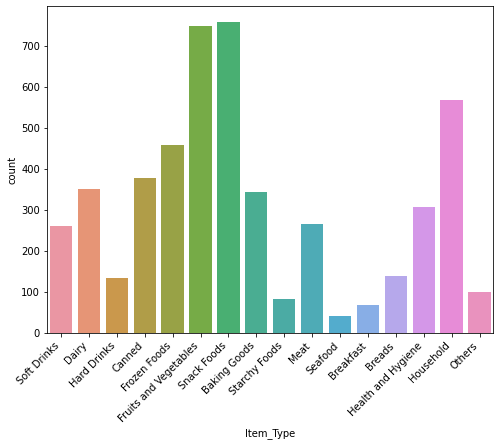

In [34]:
countplot('Item_Type')

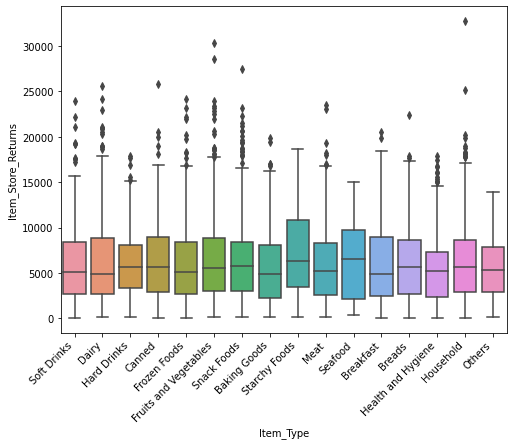

In [35]:
plot('Item_Type')

I learnt from the plots above that Snack Foods and Fruits and Vegetables were the dominant Item_types in quantity and hence they made the most profit.

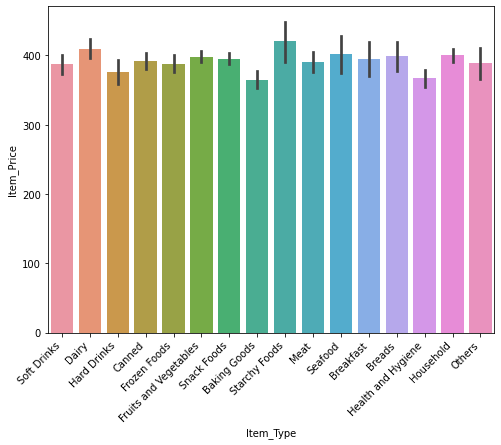

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='Item_Type',y='Item_Price',data=df)
plt.xticks(rotation=45,ha='right')
plt.show()

In [37]:
df.groupby('Store_Location_Type')['Item_Store_Returns'].sum()

Store_Location_Type
Cluster 1     7238175.37
Cluster 2    11996341.95
Cluster 3    11222048.30
Name: Item_Store_Returns, dtype: float64

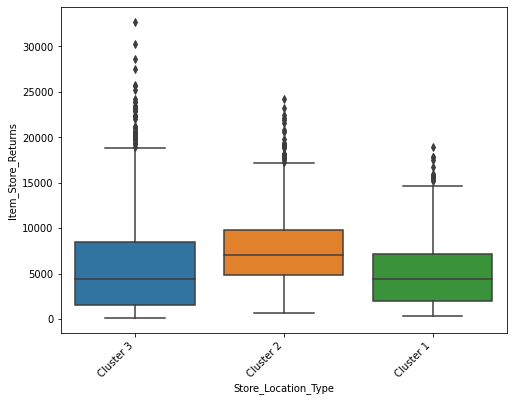

In [38]:
plot('Store_Location_Type')

As seen above, the cluster two has a high range of individual returns on products and also has the highest sum of returns among all clusters

In [39]:
df['Store_Age'] = 2021-df['Store_Start_Year']
df

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Store_Age
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.600,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,16
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.600,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,27
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.600,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69,7
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.600,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,5
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.600,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,12.909,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14,29
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,12.909,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69,29
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.650,Low Sugar,0.083528,Household,406.14,2009,Medium,Cluster 2,Supermarket Type1,5685.93,12
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.650,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00,17


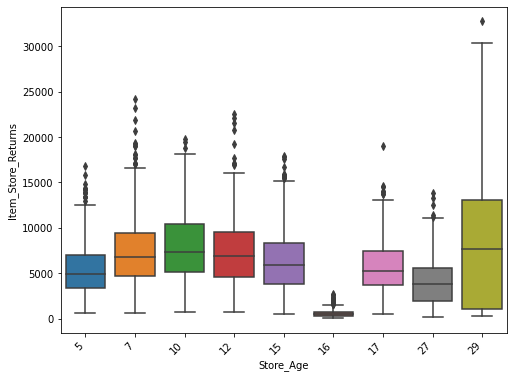

In [40]:
plot('Store_Age')

From the graph above it is infered that the profit does not progressively increase as the store age does but the oldest score made the highest range of returns on individual items

In [41]:
df['Store_Age'].value_counts()

29    802
15    620
27    594
7     583
10    515
17    509
5     500
12    483
16    384
Name: Store_Age, dtype: int64

In [42]:
df.isnull().sum()

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
Store_Age              0
dtype: int64

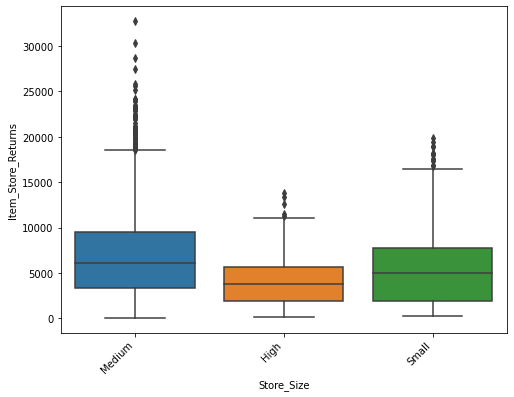

In [43]:
plot('Store_Size')

The Store size "Medium" generally made more returns as infered from the graph above

In [44]:
df['Store_Size'].mode()[0]

'Medium'

In [45]:
df['Store_Size'].value_counts()

Medium    3032
Small     1364
High       594
Name: Store_Size, dtype: int64

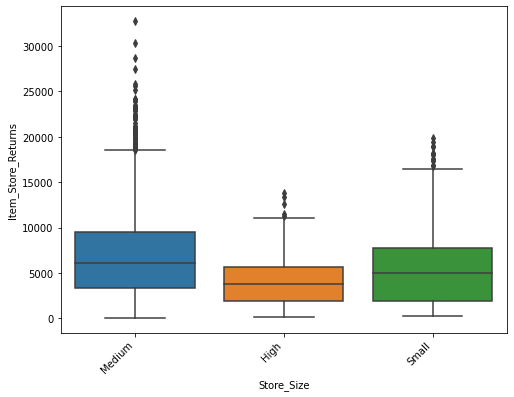

In [46]:
plot('Store_Size')

# CONCLUSION